In [10]:
import numpy as np

def find_simulation_with_params(params: np.ndarray) -> str:
    found_simulations = {}

    for simulation in range(2000):
        simulation_index = str(simulation).zfill(4)
        data_dir = f'/user_data/ajliang/Quijote/LH{simulation_index}'
        params_path = f'{data_dir}/params.npy'
        simulation_params = np.load(params_path)
        # drop the last three params, which are time dependent
        simulation_params = simulation_params[:-3]
        
        if np.allclose(simulation_params, params, rtol=1.15e-1):
            print(f'Found simulation LH{simulation_index} with params {simulation_params}')
            found_simulations[simulation_index] = simulation_params
    
    print(f'Found {len(found_simulations)} simulations')
    closest_simulation = min(found_simulations, key=lambda index: np.linalg.norm(found_simulations[index] - params))
    print(f'Closest simulation is LH{closest_simulation} with params {found_simulations[closest_simulation]}')


In [11]:
backward_model_fake_data_params = np.array([
    3.000000e-01,
    5.000000e-02,
    7.000000e-01,
    9.650000e-01,
    7.999980e-01
])

find_simulation_with_params(params=backward_model_fake_data_params)

Found simulation LH0008 with params [0.3215  0.05487 0.6429  1.0531  0.7509 ]
Found simulation LH0066 with params [0.2891  0.04827 0.6573  1.0513  0.7891 ]
Found simulation LH0332 with params [0.3195  0.04823 0.6483  0.9007  0.7913 ]
Found simulation LH0341 with params [0.3297  0.05303 0.6345  0.8753  0.7447 ]
Found simulation LH0663 with params [0.3223  0.04625 0.7015  0.9607  0.8311 ]
Found simulation LH1177 with params [0.3171  0.04597 0.7741  0.9905  0.8315 ]
Found simulation LH1276 with params [0.3323  0.04449 0.6975  0.9715  0.8873 ]
Found simulation LH1393 with params [0.2805  0.05509 0.7403  0.8989  0.7461 ]
Found simulation LH1539 with params [0.3149  0.05077 0.7161  0.9655  0.8847 ]
Found simulation LH1707 with params [0.2687  0.04949 0.7267  1.0759  0.7817 ]
Found 10 simulations
Closest simulation is LH0663 with params [0.3223  0.04625 0.7015  0.9607  0.8311 ]


In [34]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Pk_library import PKL

def get_plots_lin(
    box_length: int = 250, # Mpc/h
    axis: int = 0 # 0, 1, 2 for x, y, z respectively
):
    pred_lin_files = sorted(glob.glob('/user_data/ajliang/Quijote/LH0663/mc_dropout/0.1/*/lin_out.npy'))
    
    pred_lin_pow_spec = []
    for pred_lin_file in pred_lin_files:
        pred_lin = np.load(pred_lin_file)
        
        xpk = PKL.XPk([pred_lin[axis]], box_length, 0, (None, None))
        
        wave_num = xpk.k3D
        pred_lin_auto = xpk.Pk[:, 0, 0]
        
        pred_lin_pow_spec.append(pred_lin_auto)
    
    pred_lin_pow_spec = np.vstack(pred_lin_pow_spec)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.loglog(
        wave_num,
        np.mean(pred_lin_pow_spec, axis=0),
        label='Power Spectrum of Predicted Linear Field'
    )
    ax.fill_between(
        wave_num,
        np.mean(pred_lin_pow_spec, axis=0) - np.std(pred_lin_pow_spec, axis=0),
        np.mean(pred_lin_pow_spec, axis=0) + np.std(pred_lin_pow_spec, axis=0),
        alpha=0.2,
        color='blue'
    )
    ax.set_xlabel('Wave Number k (log scale)')
    ax.set_ylabel('Power Spectrum P(k) (log scale)')
    ax.legend()
    ax.set_title('Power Spectrum of Predicted Linear Field')
    
    fig.tight_layout()
    plt.show()

In [35]:
get_plots_lin(
    box_length=250, # Mpc/h
    axis=0 # 0, 1, 2 for x, y, z respectively
)


Computing power spectra of the fields...
Time FFTS = 1.74
Time loop = 3.71
Time taken = 5.45 seconds

Computing power spectra of the fields...


KeyboardInterrupt: 


Computing power spectra of the fields...
Time FFTS = 1.99
Time loop = 3.71
Time taken = 5.71 seconds

Computing power spectra of the fields...
Time FFTS = 2.06
Time loop = 3.70
Time taken = 5.76 seconds

Computing power spectra of the fields...
Time FFTS = 1.91
Time loop = 3.52
Time taken = 5.43 seconds

Computing power spectra of the fields...
Time FFTS = 1.82
Time loop = 3.32
Time taken = 5.15 seconds

Computing power spectra of the fields...
Time FFTS = 1.92
Time loop = 3.41
Time taken = 5.33 seconds

Computing power spectra of the fields...
Time FFTS = 1.91
Time loop = 3.58
Time taken = 5.50 seconds

Computing power spectra of the fields...
Time FFTS = 1.86
Time loop = 3.35
Time taken = 5.21 seconds

Computing power spectra of the fields...
Time FFTS = 1.98
Time loop = 3.56
Time taken = 5.55 seconds

Computing power spectra of the fields...
Time FFTS = 1.83
Time loop = 3.34
Time taken = 5.18 seconds

Computing power spectra of the fields...
Time FFTS = 1.89
Time loop = 3.38
Time t

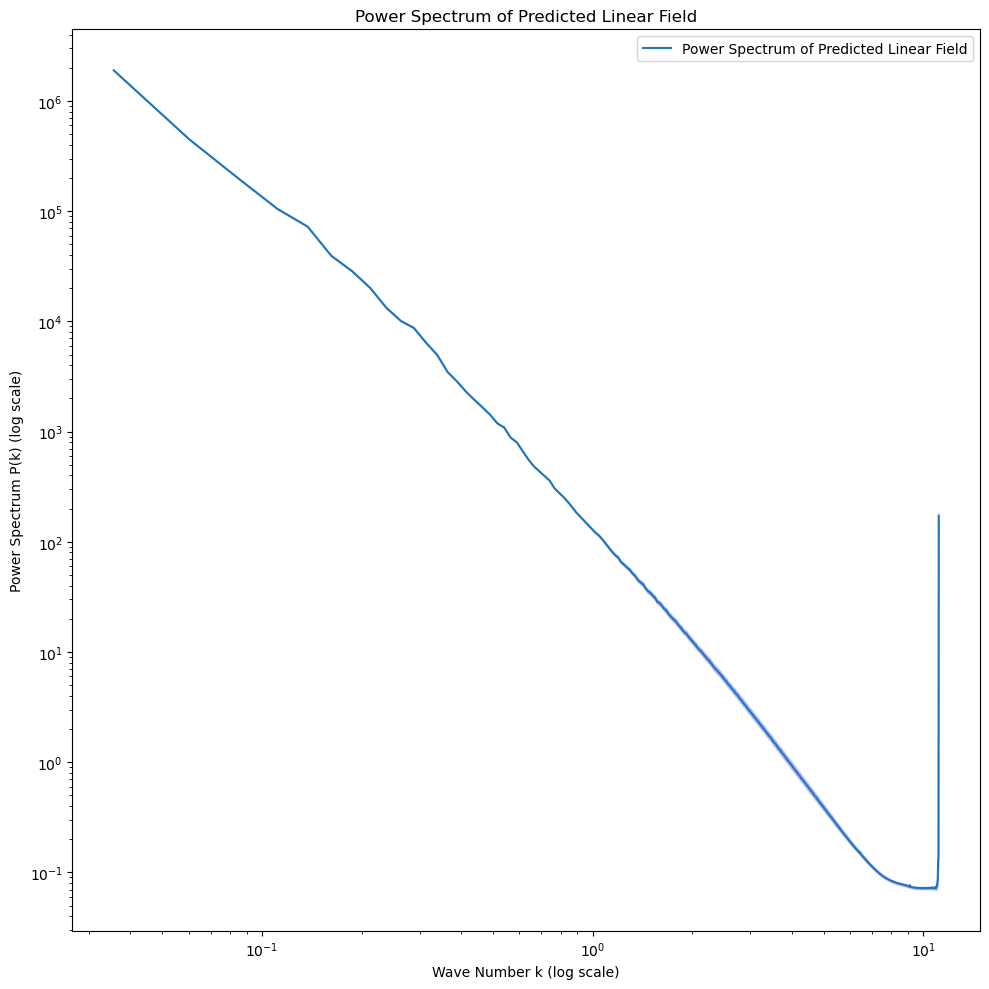

In [33]:
get_plots_lin(
    box_length=250, # Mpc/h
    axis=0 # 0, 1, 2 for x, y, z respectively
)

In [28]:
box_length, axis = 250, 0

pred_lin_files = sorted(glob.glob('/user_data/ajliang/Quijote/LH0663/mc_dropout/*/lin_out.npy'))
pred_lin_file = pred_lin_files[0]
pred_lin = np.load(pred_lin_file)
xpk = PKL.XPk([pred_lin[axis]], box_length, 0, (None, None))

--Return--
None
> /tmp/ipykernel_114723/408119646.py(6)<module>()
      3 pred_lin_files = sorted(glob.glob('/user_data/ajliang/Quijote/LH0663/mc_dropout/*/lin_out.npy'))
      4 pred_lin_file = pred_lin_files[0]
      5 pred_lin = np.load(pred_lin_file)
----> 6 import pdb; pdb.set_trace()
      7 xpk = PKL.XPk([pred_lin[axis]], box_length, 0, (None, None))

    [... skipped 1 hidden frame]

> /home/ajliang/anaconda3/envs/albert/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3436)run_code()
   3434             finally:
   3435                 # Reset our crash handler in place
-> 3436                 sys.excepthook = old_excepthook
   3437         except SystemExit as e:
   3438             if result is not None:

   3431                     await eval(code_obj, self.user_global_ns, self.user_ns)
   3432                 else:
   3433                     exec(code_obj, self.user_global_ns, self.user_ns)
   3434             finally:
   3435                 # Reset our crash

BdbQuit: 

In [26]:
pred_lin[axis].shape

(512, 512, 512)

In [30]:
get_plots_lin(
    box_length=250, # Mpc/h
    axis=0 # 0, 1, 2 for x, y, z respectively
)

# import os
# import glob

# # for roots, dirs, files in os.walk('/user_data/ajliang/Quijote/LH0663/mc_dropout'):
# #     print(roots, dirs, files)
# glob.glob('/user_data/ajliang/Quijote/LH0663/mc_dropout/*/lin_out.npy')


Computing power spectra of the fields...
Time FFTS = 2.20
Time loop = 3.64
Time taken = 5.85 seconds

Computing power spectra of the fields...
Time FFTS = 2.00
Time loop = 3.43
Time taken = 5.43 seconds

Computing power spectra of the fields...
Time FFTS = 1.98
Time loop = 3.43
Time taken = 5.42 seconds

Computing power spectra of the fields...
Time FFTS = 2.02
Time loop = 3.56
Time taken = 5.58 seconds

Computing power spectra of the fields...
Time FFTS = 1.89
Time loop = 3.44
Time taken = 5.35 seconds

Computing power spectra of the fields...
Time FFTS = 1.82
Time loop = 3.49
Time taken = 5.31 seconds

Computing power spectra of the fields...
Time FFTS = 1.80
Time loop = 3.44
Time taken = 5.24 seconds

Computing power spectra of the fields...
Time FFTS = 1.95


KeyboardInterrupt: 